Task №2
1. Develop yourself using numpy library:
a) a function to implement gradient descent (GD) algorithm
b) Adam's optimization algorithm
for a function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.


# Import packages

In [109]:
import numpy as np
from matplotlib import pyplot as plt

In [110]:
random_state = 100

Define simple f and grad_f functions.

In [111]:
def f(w):
    return np.sum(w * w)

def grad_f(w):
    return 2 * w

# Function to implement gradient descent (GD) algorithm

Link to algo: https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants

In [112]:
def gradient_descent(max_epochs, eps, initial_x, func, grad_func, alpha=0.05):
    x = initial_x
    x_history = x
    f_history = func(x)
    i = 0
    # init
    diff = eps + 1

    while i < max_epochs and diff > eps:
        delta_x = -alpha * grad_func(x)
        x = x + delta_x

        x_history = np.vstack((x_history, x))
        f_history = np.vstack((f_history, func(x)))

        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])

    return x_history, f_history

Link to algo: https://ruder.io/optimizing-gradient-descent/index.html#adam

In [113]:
def adam_gradient_descent(max_epochs, eps, initial_x, func, grad_func, alpha=0.05, beta_1=0.8, beta_2=0.999):
    x = initial_x
    x_history = x
    f_history = func(x)
    i = 0
    # init
    diff = eps + 1

    m = np.zeros(x.shape)
    v = np.zeros(x.shape)

    while i < max_epochs and diff > eps:
        grad_x = grad_func(x)

        m = beta_1 * m + (1. - beta_1) * grad_x
        v = beta_2 * v + (1. - beta_2) * pow(grad_x, 2)

        m_hat = m / (1. - pow(beta_1, i + 1))
        v_hat = v / (1. - pow(beta_2, i + 1))

        delta_x = -alpha * m_hat / (np.sqrt(v_hat) + eps)
        x = x + delta_x

        x_history = np.vstack((x_history, x))
        f_history = np.vstack((f_history, func(x)))

        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])

    return x_history, f_history

# Illustrate the process of finding an extremum

In [114]:
def show_stepping(x_history):
    x_coord = np.linspace(-10.0, 10.0, 100)
    y_coord = np.linspace(-10.0, 10.0, 100)

    x1, x2 = np.meshgrid(x_coord, y_coord)
    points = np.vstack((x1.flatten(), x2.flatten()))
    points = points.transpose()
    values = np.asarray([f(x) for x in points])

    f_plot = plt.scatter(points[:,0], points[:,1], c=values, vmin=min(values), vmax=max(values), cmap='Greens')
    plt.colorbar(f_plot)

    plt.plot(x_history[:,0], x_history[:,1], marker='o', c='blue')

    iterator = x_history.shape[0]
    for w,i in zip(x_history, range(iterator-1)):
        plt.annotate("", xy=w, xycoords='data', xytext=x_history[i + 1,:], textcoords='data')

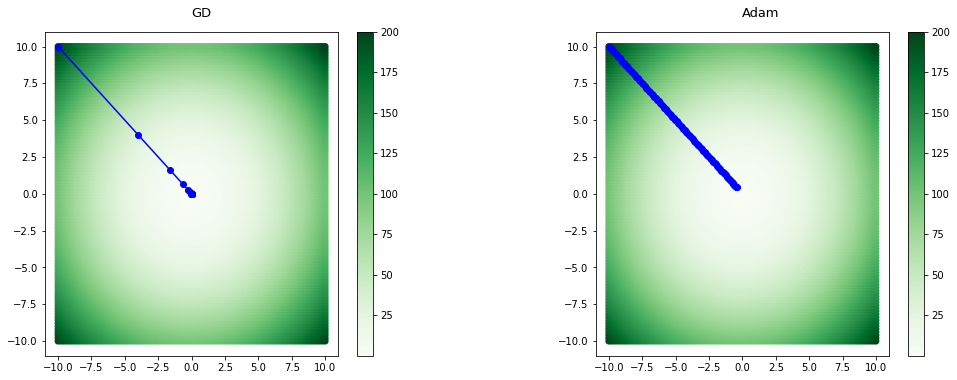

In [115]:
x_initial = np.asarray([-10., 10.])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
x_h, _ = gradient_descent(100, -10, x_initial, f, grad_f, 0.3)
show_stepping(x_h)
plt.text(0, 12, "GD", fontsize=13)

plt.subplot(1, 2, 2)
x_h, _ = adam_gradient_descent(100, -10, x_initial, f, grad_f)
show_stepping(x_h)
plt.text(0, 12, "Adam", fontsize=13)

fig.subplots_adjust(left=0.05, bottom=0.05, top=0.95, hspace=0.15, wspace=0.5)